## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from math import log
import xgboost as xgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import r2_score
import lightgbm as lgb
from sklearn.model_selection import KFold
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

## Load and explore the dataframe

In [2]:
# Load the training data
train = pd.read_csv('train_df_final.csv')

In [3]:
# Check the first three observations
train.head(3)

,3SsnPorch,Bathrooms,BedroomAbvGr,BsmtCond,BsmtQual,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,GarageArea,GarageCond,GarageQual,GrLivArea,HeatingQC,Id,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PoolArea,PoolQC,SalePrice_log,ScreenPorch,TotalBsmtSF,WoodDeckSF,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandSlope_Mod,LandSlope_Sev,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HouseAge_9,HouseAge_10,HouseAge_11,HouseAge_12,HouseAge_13,HouseAge_14,HouseAge_15,HouseAge_16,HouseAge_17,HouseAge_18,HouseAge_19,HouseAge_20,HouseAge_21,HouseAge_22,HouseAge_23,HouseAge_24,HouseAge_25,HouseAge_26,HouseAge_27,HouseAge_28,HouseAge_29,HouseAge_30,HouseAge_31,HouseAge_32,HouseAge_33,HouseAge_34,HouseAge_35,HouseAge_36,HouseAge_37,HouseAge_38,HouseAge_39,HouseAge_40,HouseAge_41,HouseAge_42,HouseAge_43,HouseAge_44,HouseAge_45,HouseAge_46,HouseAge_47,HouseAge_48,HouseAge_49,HouseAge_50,HouseAge_51,HouseAge_52,HouseAge_53,HouseAge_54,HouseAge_55,HouseAge_56,HouseAge_57,HouseAge_58,HouseAge_59,HouseAge_60,HouseAge_61,HouseAge_62,HouseAge_63,HouseAge_64,HouseAge_65,HouseAge_66,HouseAge_67,HouseAge_68,HouseAge_69,HouseAge_70,HouseAge_71,HouseAge_72,HouseAge_73,HouseAge_76,HouseAge_77,HouseAge_78,HouseAge_79,HouseAge_80,HouseAge_81,HouseAge_82,HouseAge_83,HouseAge_84,HouseAge_86,HouseAge_87,HouseAge_88,HouseAge_89,HouseAge_90,HouseAge_91,HouseAge_92,HouseAge_93,HouseAge_94,HouseAge_95,HouseAge_96,HouseAge_97,HouseAge_98,HouseAge_99,HouseAge_100,HouseAge_101,HouseAge_102,House

In [4]:
# Check the shape of the dataframe
train.shape

(1453, 356)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Columns: 356 entries, 3SsnPorch to SaleType_WD
dtypes: float64(6), int64(350)
memory usage: 3.9 MB


In [24]:
# Drop the 'Id' column from the train dataset
train.drop('Id', axis =1, inplace = True)

In [25]:
# Check the shape of the dataframe
train.shape

(1453, 355)

In [27]:
# Extract the target variable
y = train['SalePrice_log']

In [28]:
# Drop the unneeded columns
X = train.drop('SalePrice_log', axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Models

### Decision Tree

In [30]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, # max depth the tree should traverse. Good to control OverFitting. TO STOP
             min_samples_leaf = 0.13,   # mininum nuber of samples in the node before it turns into a terminal node
            random_state=3)

In [31]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

#### Evaluate the Decision tree

In [32]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {}".format(rmse_dt))

Test set RMSE of dt: 0.24898656911409453


### Random Forest

In [52]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [54]:
# Evaluate the test set RMSE
RMSE_test = (MSE(y_pred, y_test))**0.5

In [55]:
# Print the RMSE score of the validation data
print('RMSE: {}'.format(RMSE_test))

RMSE: 0.15630275654898784


In [56]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_, 
                       index = X_train.columns)

In [57]:
# Sort Importances
importances_sorted = importances.sort_values(ascending = False)

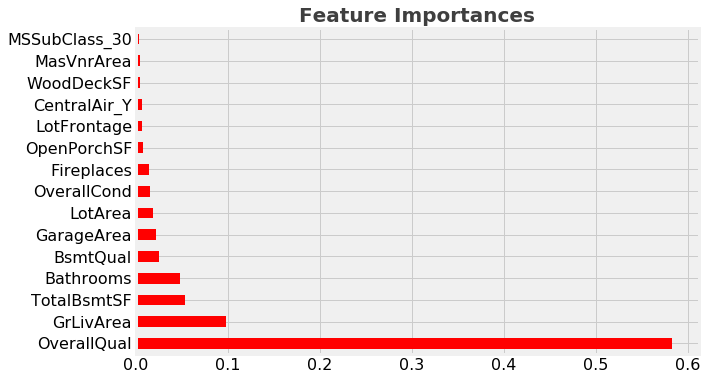

In [58]:
# Horizontal barplot
importances_sorted[:15].plot(kind = 'barh', figsize=(9,6),color = 'red')
plt.title('Feature Importances', fontsize = 20, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

#### Random forests hyperparameters

In [59]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [60]:
params_rf2 = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_depth':[4,6,8],
             'max_features': ['log2', 'auto', 'sqrt'], #The number of features to consider when looking for the best split
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.
#The number of features to consider when looking for the best split
# If “auto”, then max_features=n_features.
# If “sqrt”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).

In [61]:
grid_rf2 = GridSearchCV(estimator = rf, 
                       param_grid = params_rf2,
                       scoring = 'neg_mean_squared_error', 
                       cv= 10,
                       verbose = 1, 
                       n_jobs = -1)

In [62]:
grid_rf2.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 13.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 500, 25), 'max_depth': [4, 6, 8], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 303]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [63]:
best_model2 = grid_rf2.best_estimator_
print(best_model2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=475, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [64]:
# Predict test set labels
y_pred2 = best_model2.predict(X_test)

In [65]:
# Compute RMSE
RMSE_test = (MSE(y_test, y_pred2))**0.5

In [66]:
#print("Test MSE of the best model: {}" .format(MSE_test))
print("Test RMSE of the best model: {}" .format(RMSE_test))

Test RMSE of the best model: 0.14971368776967536


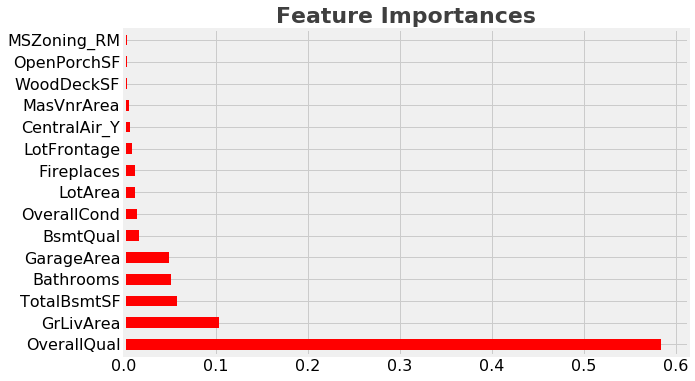

In [108]:
# Create a pd.Series of features importances
importances = pd.Series(data = best_model2.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:15].plot(kind = 'barh',figsize=(9,6),color = 'red')
plt.title('Feature Importances', fontsize = 22, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

### Gradient Boosting Regression

In [68]:
#Instantiate GBR
gb = GradientBoostingRegressor()

In [69]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
y_pred = gb.predict(X_test)

In [71]:
MSE_test = MSE(y_pred, y_test)

In [72]:
RMSE_test = MSE(y_pred, y_test)**0.5

In [73]:
print('Test set MSE of gb: {}'.format(MSE_test))
print('Test set RMSE of gb: {}'.format(RMSE_test))

Test set MSE of gb: 0.01745093431223511
Test set RMSE of gb: 0.132101984512857


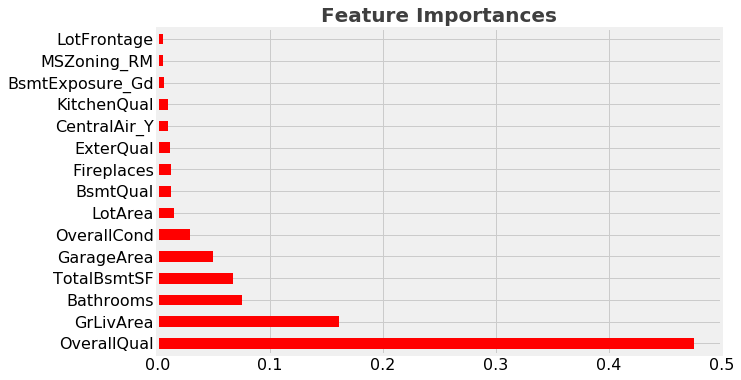

In [107]:
# Create a pd.Series of features importances
importances = pd.Series(data = gb.feature_importances_, 
                       index = X_train.columns)

# Sort Importances
importances_sorted = importances.sort_values(ascending = False)

# Horizontal barplot
importances_sorted[:15].plot(kind = 'barh',figsize=(9,6),color = 'red')
plt.title('Feature Importances', fontsize = 20, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

###  stochastic gradient boosting regression

In [75]:
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,               
            random_state=2)

In [76]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=0.9, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

#Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set MSE of sgbr: {:.3f}'.format(mse_test))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set MSE of sgbr: 0.016
Test set RMSE of sgbr: 0.128


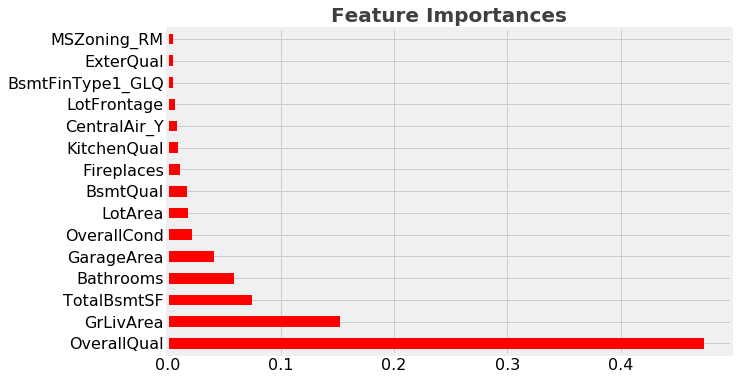

In [106]:
# Create a pd.Series of features importances
importances = pd.Series(data = sgbr.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:15].plot(kind = 'barh',figsize=(9,6),color = 'red')
plt.title('Feature Importances', fontsize = 20, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

## LightGBM

In [118]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import mean_squared_error
# Modeling
import lightgbm as lgb

# Evaluation of the model
from sklearn.model_selection import KFold
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

### GridSearchCV

In [119]:
# Initilize estimator
lgb_model = lgb.LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
lgb_model


LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective=None, random_state=2018, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)

In [16]:
# Define space of hyperparameters
hyper_space = {'n_estimators': [1000, 1500, 2000, 2500],
               'max_depth':  [4, 5, 8, -1],
               'num_leaves': [15, 31, 63, 127],
               'subsample': [0.6, 0.7, 0.8, 1.0],
               'colsample_bytree': [0.6, 0.7, 0.8, 1.0]}

In [89]:
# Grid Search CV
gs = GridSearchCV(model, hyper_space, scoring='rmse', cv=4, verbose=1)
gs_results = gs.fit(X_train, y_train)
print("BEST PARAMETERS: " + str(gs_results.best_params_))
print("BEST CV SCORE: " + str(gs_results.best_score_))

Fitting 4 folds for each of 1024 candidates, totalling 4096 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4096 out of 4096 | elapsed: 91.0min finished


BEST PARAMETERS: {'colsample_bytree': 0.6, 'max_depth': -1, 'n_estimators': 1000, 'num_leaves': 15, 'subsample': 0.6}
BEST CV SCORE: 0.8862782900684413


In [90]:
# save the model to disk
import pickle
filename = 'gridsearch_lgbm_model.sav'
pickle.dump(gs, open(filename, 'wb'))

In [92]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9028779808050137


In [93]:
# Predict (after fitting GridSearchCV is an estimator with best parameters)
y_pred = gs.predict(X_test)

# Score
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))

R2 SCORE ON TEST DATA: 0.9028779808050137


### RandomSearchCV

In [79]:
hyper_space = {
    'n_estimators':sp_randint(1000,2500),
    'max_depth': [4,5,8,-1],
    'num_leaves': [15,31,63,127],
    'subsample': sp_uniform(0.6,0.4),
    'colsample_bytree': sp_uniform(0.6,0.4)
}

In [87]:
#RandomSearchCV
rs = RandomizedSearchCV(model, hyper_space,
                             n_iter = 60, scoring='r2', cv=4, verbose=1,random_state=2018)
rs_results = rs.fit(X_train, y_train)
print("BEST PARAMETERS: " +str(rs_results.best_params_))
print("BEST CV SCORE: " +str(rs_results.best_score_))

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 11.0min finished


BEST PARAMETERS: {'colsample_bytree': 0.624105273824358, 'max_depth': 8, 'n_estimators': 1587, 'num_leaves': 63, 'subsample': 0.6959020454914973}
BEST CV SCORE: 0.8908316851063887


In [111]:
hyper_space_best_params = {
    'colsample_bytree': 0.624105273824358, 
    'max_depth': 8, 
    'n_estimators': 1587, 
    'num_leaves': 63, 
    'subsample': 0.6959020454914973
}

In [89]:
import pickle
# save the model to disk
filename = 'randomsearch_lgbm_model.sav'
pickle.dump(rs, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = 

In [90]:
# Predict (after fitting RandomizedSearchCV is an estimator with best parameters)
y_pred = rs.predict(X_test)

In [91]:
#Compute RMSE
RMSE_test = (MSE(y_test, y_pred))**0.5

In [94]:
print('RMSE SCORE ON TEST DATA: {}' .format (RMSE_test))

RMSE SCORE ON TEST DATA: 0.1306368245153083


In [93]:
# Score
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))

R2 SCORE ON TEST DATA: 0.8964661017608833


### Bayesian Optimization

In [95]:
### Tree-structured Parzen Estimator

In [96]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll.stochastic import sample

In [97]:
# Define searched space
hyper_space = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

In [98]:
# Objective minizmied 
hyperopt_objective = lambda params: (-1.0) * evaluate(params, X_train, y_train)

In [99]:
# Objective function (CV R2)
def evaluate(params, X, y):
    
    # Initilize instance of estimator
    model = lgb.LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
        
    # Set params
    model.set_params(**params)
    
    # Calc CV score
    scores = cross_val_score(estimator=model, X=X, y=y, 
                             scoring='r2', cv=4)
    score = np.mean(scores)

    return score
# Objective minizmied 
hyperopt_objective = lambda params: (-1.0) * evaluate(params, X_train, y_train)

In [100]:
# Hyperoptimization (Tree Parzen Estimator)
#============================================================================== 
# Trail
trials = Trials()

# Set algoritm parameters
algo = partial(tpe.suggest, 
               n_startup_jobs=20, gamma=0.25, n_EI_candidates=24)

# Fit Tree Parzen Estimator
best_vals = fmin(hyperopt_objective, space=hyper_space,
                 algo=algo, max_evals=60, trials=trials,
                 rstate=np.random.RandomState(seed=2018))

# Print best parameters
best_params = space_eval(hyper_space, best_vals)
print("BEST PARAMETERS: " + str(best_params))

# Print best CV score
scores = [-trial['result']['loss'] for trial in trials.trials]
print("BEST CV SCORE: " + str(np.max(scores)))

# Print execution time
tdiff = trials.trials[-1]['book_time'] - trials.trials[0]['book_time']
print("ELAPSED TIME: " + str(tdiff.total_seconds() / 60))    

# Set params
model.set_params(**best_params)

# Fit    
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predict
#Compute RMSE
RMSE_test = (MSE(y_test, y_pred))**0.5
print("RMSE SCORE ON TEST DATA: {}".format(RMSE_test))

score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))


BEST PARAMETERS: {'colsample_bytree': 0.6229137069188099, 'max_depth': 8, 'n_estimators': 1123, 'num_leaves': 31, 'subsample': 0.8963544569541605}
BEST CV SCORE: 0.8917826281689606
ELAPSED TIME: 9.59615
RMSE SCORE ON TEST DATA: 0.12950506805129872
R2 SCORE ON TEST DATA: 0.8982522381361572


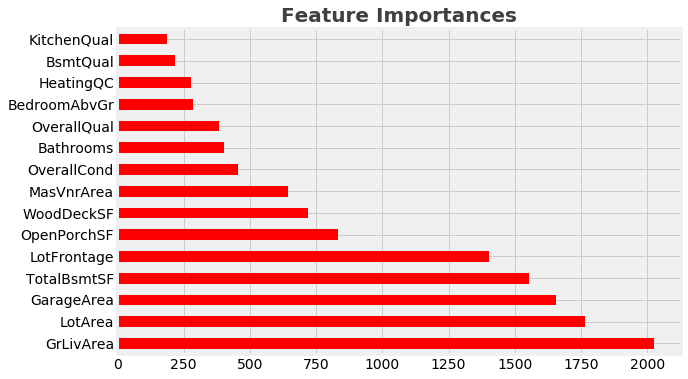

In [109]:
# Create a pd.Series of features importances
importances = pd.Series(data = model.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:15].plot(kind = 'barh',figsize=(9,6),color = 'red')
plt.title('Feature Importances', fontsize = 20, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

## XGBoost

### XGBoost --- tree

In [110]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.021233


In [121]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(X_train, y_train)
DM_test = xgb.DMatrix(X_test, y_test)

In [122]:
# Create a parameter dictionary:params
params = {'booster': 'gblinear', 'objective': 'reg:linear'}

In [123]:
housing_matrix = xgb.DMatrix(data = X_train, label = y_train)

In [124]:
# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain = DM_train, num_boost_round=5)

In [125]:
# Predict the labels of the test set = preds
preds = xg_reg.predict(DM_test)

In [126]:
# Compute and print RMSE
rmse = np.sqrt(MSE(y_test,preds))
print('RMSE: {}'.format(rmse))

RMSE: 0.8367781393761787


In [127]:
params = {'objective': 'reg:linear', 'max_depth': 4}

In [128]:
cv_results = xgb.cv(dtrain = housing_matrix, params = params, nfold=4,
                   num_boost_round = 5, 
                   metrics = 'rmse', as_pandas = True, seed = 123)

[23:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [129]:
print (cv_results)

   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0        8.082251       0.029078         8.082313        0.006233
1        5.667503       0.031083         5.667582        0.004490
2        3.976911       0.029321         3.976955        0.003188
3        2.792708       0.031097         2.793736        0.002337
4        1.966413       0.032432         1.965689        0.001625


In [130]:
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

4    1.966413
Name: test-rmse-mean, dtype: float64


#### Mean Absolute Error

In [131]:
cv_results_mae = xgb.cv(dtrain = housing_matrix,
                        params = params,
                        nfold = 4,
                        num_boost_round = 5,
                        metrics = 'mae',
                        as_pandas = True,
                        seed = 123
                       )

[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:19:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [132]:
print(cv_results_mae)

   test-mae-mean  test-mae-std  train-mae-mean  train-mae-std
0       8.072945      0.028586        8.072967       0.006066
1       5.654225      0.030405        5.654248       0.004248
2       3.962476      0.028555        3.962463       0.002974
3       2.775752      0.030057        2.776814       0.002090
4       1.947870      0.031710        1.947440       0.001381


In [133]:
# Last Round test score
print(cv_results_mae['test-mae-mean'].tail(1))

4    1.94787
Name: test-mae-mean, dtype: float64


### Tuning the number of boosting rounds

In [134]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
# number of boosting rounds = number of trees we build)
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# We'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.
# Iterate over num_rounds and build one model per num_boost_round parameter

for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))

df_num_boost_runs = pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"])


[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:20:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:20:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

In [135]:
print (df_num_boost_runs)

   num_boosting_rounds      rmse
0                    5  1.969639
1                   10  0.377388
2                   15  0.167469


### Automated boosting round selection using early_stopping

In [136]:
# early stopping technique: More automated tuning compared to cherry picking parameters to tune.
# Early stopping works by testing the XGBoost model after every boosting
# round against a hold-out dataset and stopping the creation of 
# additional boosting rounds (thereby finishing training of the model 
# early) if the hold-out metric ("rmse" in our case) does not improve 
# for a given number of rounds. Here you will use the 
# early_stopping_rounds parameter in xgb.cv() with a large possible 
# number of boosting rounds (50). Bear in mind that if the holdout 
# metric continuously improves up through when num_boosting_rounds is 
# reached, then early stopping does not occur.

In [137]:
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix, params = params, metrics = 'rmse', num_boost_round = 50, early_stopping_rounds = 10)

# Print cv_results
print(cv_results)
auto_early_stopping_df = pd.DataFrame(cv_results, columns = ['test-rmse-mean', 'test-rmse-std' , 'train-rmse-mean',  'train-rmse-std'])
print(auto_early_stopping_df)

[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:20:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[23:20:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[23:20:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_

We will implement LightGBM gradient boosting machine. This is fast and achieves results comparable to extreme gradient boosting, XGBoost. For the baseline model, we will use the default hyperparameters as specified in LightGBM.